# Metin madenciliği , NLP ile Deprem yardım çağrısı tespiti projesi kod bölümü :

# 1 ) gerekli kütüphaneler yükleniyor .

In [1]:
!pip install vngrs-nlp # vnlp kütüphanesi yükleniyor .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.8/17.8 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 73.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.2 MB/s eta 0:00:00


In [2]:
!pip install zeyrek # zeyrek kütüphanesi yükleniyor .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 931.0/931.0 kB 17.4 MB/s eta 0:00:00


# 2) kullanılacak  fonksyonlar çağrılıyor .

In [3]:
import pandas as pd

In [4]:
# ------------------------------------  vnlp fonksyonları 

'''
# bu kısım ipta edildi .

from vnlp import StemmerAnalyzer
stemmer_analyzer = StemmerAnalyzer()

'''

# Normalizer fonksiyonu Türkçe kelimelerin normalizasyonu için kullanılan bir fonksiyondur. 
#Türkçe kelimelerin büyük/küçük harf farklılıkları, özel karakterlerin temizlenmesi gibi işlemleri gerçekleştirir.
from vnlp import Normalizer
normalizer = Normalizer()


#Türkçe kelimelerde anlamsız olarak kabul edilen kelimelerin çıkarılması için kullanılan bir fonksiyondur.
# Örnek olarak "ve", "veya", "ise" gibi kelimeler verilebilir.
from vnlp import StopwordRemover
stopword_remover = StopwordRemover()

# ------------------------------------  zeyrek fonksyonları 

# verilen kelimenin Türkçe dilbilgisi kurallarına göre kökünü bulmak için kullanılır.
import zeyrek
analyzer = zeyrek.MorphAnalyzer()

# ----------------------------------   ek olarak 

# Natural Language Toolkit (NLTK) kütüphanesini kullanarak, "punkt" adlı bir kaynağı indirir. 
#"punkt", cümle ayrıştırıcısı olarak adlandırılan bir aracı içerir.

import nltk
nltk.download('punkt')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# 3) veri ön işleme

In [5]:
# metin içerisindeki emojileri silmek için kullanılacak bir fonksiyon yazılıyor .

import re
def remove_emojis(data): # emoji silme fonksiyonu
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [6]:
# veri ön işleme yapacağınız fonksyonu yazıyoruz .
# Bu fonksiyon gelen metnin tahmin modeli için uygun hale getirecek şekilde düzenler .
# yapılan işlemler fonksiyonda belirtilmiştir .

def metin_düzeltme(metin_index):
  silinmiş_hal =remove_emojis( str(data.Tweets[data.index==metin_index].values) ) # emoji silme 
  silinmiş_hal = re.sub(r'[@#]\w+\s*', '', silinmiş_hal) # önünde # veya @ olan kelimeleri siler 
  işaretsiz_hali=normalizer.remove_punctuations(silinmiş_hal) # noktalama işaretleri silindi 
  küçük_harf=normalizer.lower_case(işaretsiz_hali) # büyük harfler değiştirildi .
  kelimeler = stopword_remover.drop_stop_words(küçük_harf.split()) # kelimeleri köklerine çevirmek metni için bölüyoruz .
  kelime_kökü=[ analyzer.lemmatize(kelime) for kelime in kelimeler ] # kökler döndürülür .

  son_kelime=[]

  for i in kelime_kökü:
    son_kelime.append(normalizer.remove_punctuations( str( i ).split()[1])) # olası kelime kökleri gelir ve yazılır .
  
  son_kelime = " ".join(son_kelime) # kelimeler birleştiriliyor .
  
  son_kelime=normalizer.lower_case(son_kelime) # büyük harfler küçük harflerle değiştirildi .
  # son_kelime = normalizer.convert_numbers_to_words(son_kelime.split()) # sayıları rakamlardan harflere çeviriyor .

  # en son olarak metin yeni hali eski halinin üzerine yazılıyor .
  data.Tweets[data.index==metin_index] = data.Tweets[data.index==metin_index].replace(data.Tweets[data.index==metin_index].values , son_kelime )  



In [ ]:
# burada ön işleme fonksyonu sırasıyla tüm tweetler için uygulanıyor .
# 1 kerede çalıştırmaya çalıştığımda sistemde yavaşlama yaşanıyordu time sleep sayesinde program daha rahat çalışmaya başladı .
'''
import time

for i in range(len(data)):
  metin_düzeltme(i)
  if(i%5==0):
    time.sleep(1)
'''  

'\nfor i in range(len(data)):\n  metin_düzeltme(i)\n  if(i%5==0):\n    time.sleep(1)\n'

In [ ]:
# Burada ön işleme sonucu elde edilen yeni veri seti csv uzantısıyla yeni bir dosya haline getirilerek kaydediliyor .
# bu işlemin amacı sadece 1 kere ön işleme sürecinden geçirerek veri setini düzenlemek . 
#1 kere düzenlendikten sonra ön işleme süreciyle işimiz kalmadığı için csv ye kaydedip bu kısmı bir daha çalıştırmamak üzere kapatıyoruz .

'''
data.to_csv("ekleme2.1_temiz.csv", index = False)
'''

# 4) Veri analizi 

In [7]:
import pandas as pd

In [8]:
data=pd.read_csv("/content/drive/MyDrive/ekleme2.1_temiz.csv") # ön işleme sürecinden geçmiş veri setimiz 

data =data.drop_duplicates() # tekrar eden verileri silme
data=data.dropna() # ön işleme sonucu boş duruma gelen veri varsa temizlenir
data

,Tweets,Class
0,dabaşı mahallesi atatürk cadde no 237 tat döne...,1.0
1,tay antakya akevler mh 424 sk melis ap nçok ac...,1.0
2,acilbu aile bir birey konuşmak ge afad görev b...,1.0
3,ilginnfatma kazak aile göçük altın afaddan ge ...,1.0
4,abaşı mahallesi deşmek cadde hazret hı meydan ...,1.0
...,...,...
3332,sıla yüzgüleç yetmiş saat hayat çıkma vinç ger...,0.0
3335,alwaysheadshot afadbaskanlik ahbap haluklevent...,0.0
3336,karakter köpeklemek çökmek bun adet deprem çal...,0.0
3337,teyitlinnbinada hamile kadın doktor varnnodaba...,0.0


In [11]:
import matplotlib.pyplot as plt

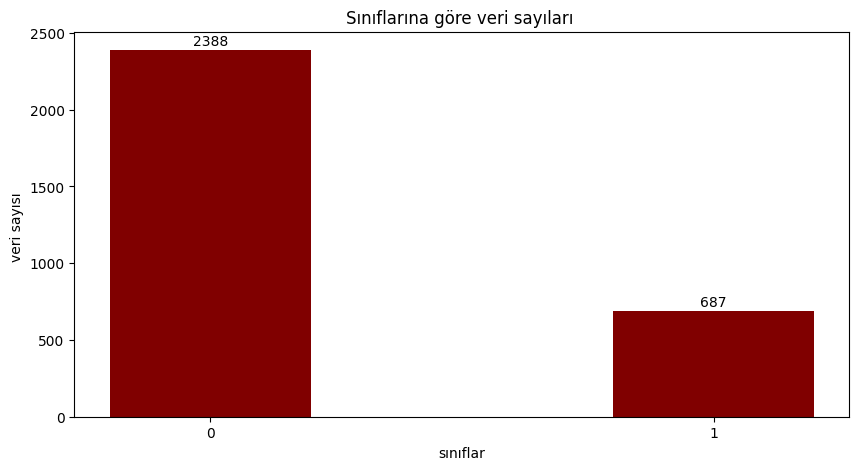

In [12]:
# 0 ve 1 sınıfı veri miktarları . görselleştirme ile desteklenmiştir .

x = ['0', '1']
y = list(data.Class.value_counts())

fig = plt.figure(figsize = (10, 5))

# bar grafiği ile veri miktarları görselleştiriliyor .
plt.bar(x, y, color ='maroon',
        width = 0.4)

plt.xlabel("sınıflar")
plt.ylabel("veri sayısı ")
plt.title("Sınıflarına göre veri sayıları ")

# bar grafiği üzerine veri sayısı eklenir .
for i in range(len(x)):
    plt.text(i, y[i] + 100, str(y[i]), ha='center', va='top')

plt.show()


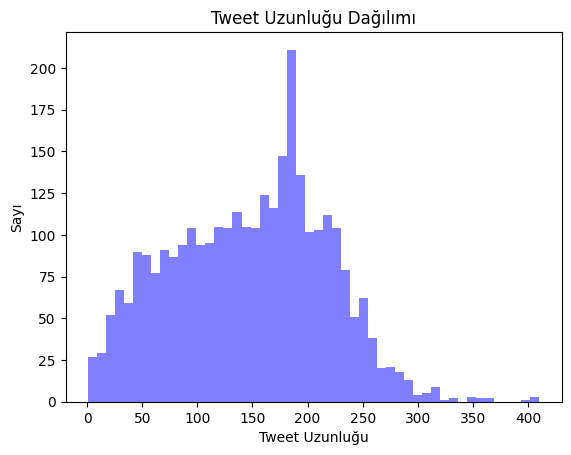

In [10]:
# kelime uzunlukları dağılımı .

lengths = data.Tweets.apply(len)

plt.hist(lengths, bins=50, color='blue', alpha=0.5)
plt.xlabel('Tweet Uzunluğu')
plt.ylabel('Sayı')
plt.title('Tweet Uzunluğu Dağılımı')
plt.show()


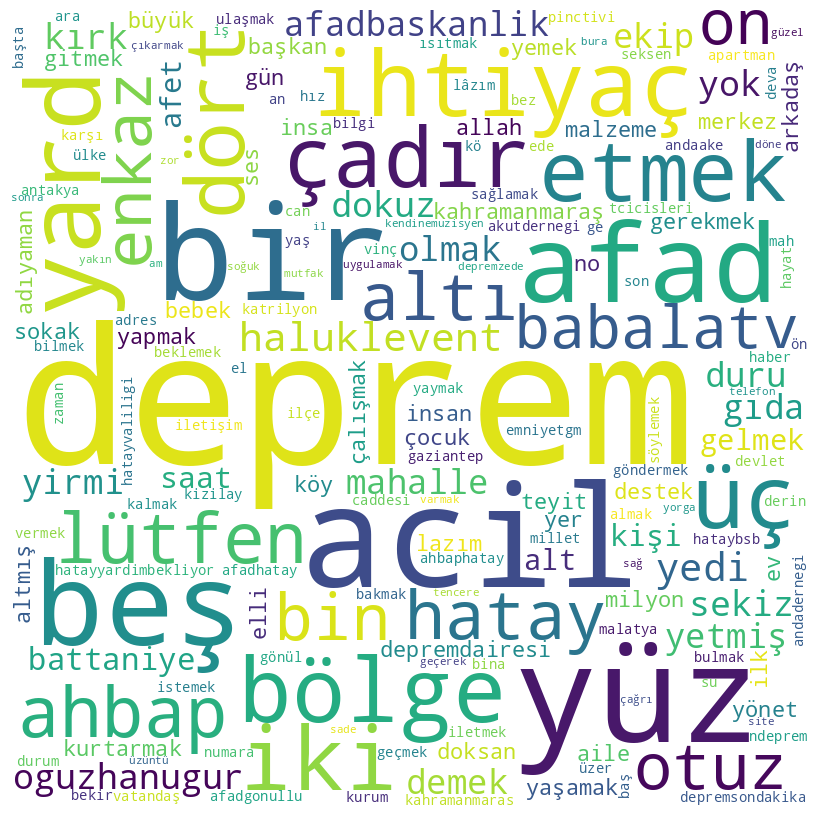

In [13]:
# wordcloud ile metinde geçen kelimeleri inceleyeliyoruz  .


all_words = []

for tweet in data["Tweets"]:
    words = tweet.split()
    all_words.extend(words)

from collections import Counter

word_freq = Counter(all_words)

from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = [], 
                min_font_size = 10).generate_from_frequencies(word_freq)

import matplotlib.pyplot as plt
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 


# 5) Model seçimi 

In [ ]:
# model seçimi için lazypredict kütüphanesinden yararlanacaz .
# lazypredict içerisinde bulundurduğu modelleri verisetimizin tahmin doğruluğuna göre sıralayarak veren bir kütüphanedir .
# regresyon ve sınıflandırma problemine göre farklı modeller kullanır .

!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score

import numpy as np


# Tweetler modele girmeden önce sayısal hale getirilmesi gerekir .
# burada veriler sayısallaştırılarak modele uygun hale getirilir .
x = np.array(data["Tweets"])
y = np.array(data["Class"])


cv = CountVectorizer()
X = cv.fit_transform(x) 

# verilerin doğruluklarını test etmek için eğitim ve test verisi olmak üzere 2ye ayrılıyor . 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) 

X_train = X_train.toarray()
X_test = X_test.toarray()





In [ ]:
# LazyClassifier çağrılarak verilerin sınıflandırma modelleri performansı toplu bir şekilde inceleniyor .

from lazypredict.Supervised import LazyClassifier

# bu fonksyonda normalde ölçü metriği olarak LazyClassifier modeli  precision ve recall'ı kullanmadığı için dışardan ekleniyor .
def custom_score(y_true, y_pred):
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    return (precision, recall)

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=custom_score)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [14:54<00:00, 30.85s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
Perceptron                         0.88               0.85     0.85      0.88   
AdaBoostClassifier                 0.90               0.83     0.83      0.90   
XGBClassifier                      0.90               0.83     0.83      0.89   
LGBMClassifier                     0.89               0.82     0.82      0.89   
BaggingClassifier                  0.89               0.80     0.80      0.88   
LogisticRegression                 0.88               0.80     0.80      0.87   
DecisionTreeClassifier             0.87               0.80     0.80      0.87   
PassiveAggressiveClassifier        0.84               0.79     0.79      0.85   
NearestCentroid                    0.88               0.79     0.79      0.88   
BernoulliNB                        0.88               0.79     0.79      0.88   
RandomForestClassifier      

Model                                                                           
Perceptron                         0.88               0.85     0.85      0.88   
AdaBoostClassifier                 0.90               0.83     0.83      0.90   
XGBClassifier                      0.90               0.83     0.83      0.89   
LGBMClassifier                     0.89               0.82     0.82      0.89   
BaggingClassifier                  0.89               0.80     0.80      0.88   
LogisticRegression                 0.88               0.80     0.80      0.87   
DecisionTreeClassifier             0.87               0.80     0.80      0.87   
PassiveAggressiveClassifier        0.84               0.79     0.79      0.85   
NearestCentroid                    0.88               0.79     0.79      0.88   
BernoulliNB                        0.88               0.79     0.79      0.88   
RandomForestClassifier             0.88               0.79     0.79      0.87   
LinearSVC                          0.84               0.78     0.78      0.84   
ExtraTreesClassifier               0.87               0.78     0.78      0.86   
ExtraTreeClassifier                0.84               0.75     0.75      0.84   
RidgeClassifierCV                  0.84               0.75     0.75      0.83   
LinearDiscriminantAnalysis         0.81               0.75     0.75      0.81   
RidgeClassifier                    0.82               0.73     0.73      0.82   
GaussianNB                         0.77               0.71     0.71      0.78   
SVC                                0.86               0.70     0.70      0.84   
CalibratedClassifierCV             0.82               0.62     0.62      0.78   
SGDClassifier                      0.81               0.59     0.59      0.76   
LabelPropagation                   0.78               0.51     0.51      0.69   
LabelSpreading                     0.78               0.51     0.51      0.69   
KNeighborsClassifier               0.78               0.51     0.51      0.69   
QuadraticDiscriminantAnalysis      0.33               0.51     0.51      0.31   
DummyClassifier                    0.77               0.50     0.50      0.68   

                                                           custom_score  \
Model                                                                     
Perceptron                     (0.8229354991238561, 0.8509612478084759)   
AdaBoostClassifier              (0.881331628774791, 0.8336104225863007)   
XGBClassifier                  (0.8634607019774484, 0.8283583217459645)   
LGBMClassifier                 (0.8531719476695554, 0.8190632368055135)   
BaggingClassifier              (0.8644250643652319, 0.8037830240009673)   
LogisticRegression             (0.8358585858585859, 0.8015234870926788)   
DecisionTreeClassifier         (0.8306818181818182, 0.7968759446224534)   
PassiveAggressiveClassifier    (0.7758891435362023, 0.7947448763678133)   
NearestCentroid                (0.8616024386572332, 0.7904449549604015)   
BernoulliNB                    (0.8575630252100841, 0.7893945347923342)   
RandomForestClassifier         (0.8558162727683276, 0.7857974124901759)   
LinearSVC                      (0.7650505676536046, 0.7843993712592952)   
ExtraTreesClassifier           (0.8293114543114544, 0.7784444713137053)   
ExtraTreeClassifier            (0.7782562431416886, 0.7529472220542893)   
RidgeClassifierCV              (0.7698367346938776, 0.7497959615500877)   
LinearDiscriminantAnalysis     (0.7320449874400548, 0.7457227495314673)   
RidgeClassifier                 (0.7419904837430611, 0.730601233299075)   
GaussianNB                      (0.6811962987442168, 0.707174596457288)   
SVC                            (0.8999359834166565, 0.6982875884166616)   
CalibratedClassifierCV         (0.8686290096324698, 0.6191508977691796)   
SGDClassifier                  (0.8367521367521368, 0.5893234991838462)   
LabelPropagation               (0.6672167216721672, 0.5137839308385225)   
LabelSpreading                 (0.6672167216721672, 0.5137839308385225)   
KNeighborsClassifier            (0.722495894909688, 0.5122876488724987)   
QuadraticDiscriminantAnalysis  (0.5123537419972036, 0.5101490236382322)   
DummyClassifier                              (0.38699186991869916, 0.5)   

                               Time Taken  
Model                                      
Perceptron                           1.91  
AdaBoostClassifier                  30.57  
XGBClassifier                       96.50  
LGBMClassifier                       2.89  
BaggingClassifier                   35.00  
LogisticRegression                   7.14  
DecisionTreeClassifier               4.29  
PassiveAggressiveClassifier          2.88  
NearestCentroid                      1.88  
BernoulliNB                          1.95  
RandomForestClassifier              10.57  
LinearSVC                           65.93  
ExtraTreesClassifier                26.65  
ExtraTreeClassifier                  2.01  
RidgeClassifierCV                    9.26  
LinearDiscriminantAnalysis          33.78  
RidgeClassifier                      4.22  
GaussianNB                           1.64  
SVC                                 74.55  
CalibratedClassifierCV             265.52  
SGDClassifier                        4.40  
LabelPropagation                     4.63  
LabelSpreading                       6.66  
KNeighborsClassifier                 2.38  
QuadraticDiscriminantAnalysis       28.94  
DummyClassifier                      1.31  

# 6) Model Optimizer 



*   Bu aşamada yukarıdaki sonuçlara göre  en iyi sonucu veren 3 model belirlendi .


*   Belirlenen bu modeller arasında en iyi parametreleri bulmak için GridSearch yapılıyor .
*   GridSearch sonucu bulunan en iyi parametreler ile işleme devam ediliyor .







## AdaBoostClassifier

In [15]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import balanced_accuracy_score
import numpy as np

# Aşağıda yapılan GridSearc kodları bulunmaktadır .
# En iyi parametreler bulunduktan sonra kullanılmayacağı için yorum satırları haline çevrilmiştir .

'''
# Model oluşturma
model = AdaBoostClassifier()

# Hiperparametrelerin grid'i
param_grid = {
    'n_estimators': [90, 85, 95],
    'learning_rate': [1.2, 0.8, 1]
    }


# GridSearchCV kullanarak hiperparametre ayarlaması yapma
cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=cv, n_jobs=-1, scoring='balanced_accuracy' )
grid_search.fit(X, y)

# En iyi sonuçları ve parametreleri yazdırma
print("En iyi skor: %f" % grid_search.best_score_)
print("En iyi parametreler: ", grid_search.best_params_)


'''

'\n# Model oluşturma\nmodel = AdaBoostClassifier()\n\n# Hiperparametrelerin grid\'i\nparam_grid = {\n    \'n_estimators\': [90, 85, 95],\n    \'learning_rate\': [1.2, 0.8, 1]\n    }\n\n\n# GridSearchCV kullanarak hiperparametre ayarlaması yapma\ncv = KFold(n_splits=5, shuffle=True, random_state=42)\ngrid_search = GridSearchCV(model, param_grid, cv=cv, n_jobs=-1, scoring=\'balanced_accuracy\' )\ngrid_search.fit(X, y)\n\n# En iyi sonuçları ve parametreleri yazdırma\nprint("En iyi skor: %f" % grid_search.best_score_)\nprint("En iyi parametreler: ", grid_search.best_params_)\n\n\n'

In [37]:
# Bulunan en iyi parametreler .
abc = AdaBoostClassifier(n_estimators=90 , learning_rate=0.5 , random_state=42 )

model = abc.fit(X_train, y_train)

y_pred_ada = model.predict(X_test) # Eğitilen train verilerine göre test verileri için tahmin yapılıyor .

In [38]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [39]:

# Model performansı sonuçları .

print("Accuracy:",balanced_accuracy_score(y_test, y_pred_ada))
print("f1_score:",f1_score(y_test, y_pred_ada))
target_names = [ 'yardım çağrısı olmayan ','yardım çağrısı']
print(classification_report(y_test, y_pred_ada  , target_names=target_names))

print("doğruluk metriği :")
print(confusion_matrix(y_test, y_pred_ada))

Accuracy: 0.84650262982891
f1_score: 0.7890625
                         precision    recall  f1-score   support

yardım çağrısı olmayan        0.92      0.97      0.94       476
         yardım çağrısı       0.86      0.73      0.79       139

               accuracy                           0.91       615
              macro avg       0.89      0.85      0.87       615
           weighted avg       0.91      0.91      0.91       615

doğruluk metriği :
[[460  16]
 [ 38 101]]


## LGBMClassifier

In [69]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

In [56]:
'''
# LGBMClassifier modelini tanımlayın
lgbm_model = LGBMClassifier(    )

# GridSearchCV için olası parametre değerleri ve aralıklarını belirleyin
param_grid = {
    'n_estimators': [245, 250 , 255] ,
    'max_depth': [ 10  ],
    'learning_rate': [ 0.05 ,0.06 ,0.04] 
}


print(" -------------  Balance_accuracy skoru  -----------------------")
# GridSearchCV nesnesini tanımlayın
grid_search = GridSearchCV(estimator=lgbm_model, param_grid=param_grid, cv=5, scoring='balanced_accuracy')

# GridSearchCV'yi eğitin
grid_search.fit(X_train, y_train)

# En iyi parametreleri ve skoru yazdırın
print("En iyi parametreler: ", grid_search.best_params_)
print("En iyi skor: ", grid_search.best_score_)

'''

 -------------  Balance_accuracy skoru  -----------------------
En iyi parametreler:  {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 250}
En iyi skor:  0.8400458357030149


In [70]:
lgbm = LGBMClassifier(max_depth=3 , num_leaves=5 , learning_rate=0.15 ,random_state =42)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Balanced_accuracy:",balanced_accuracy_score(y_test, y_pred_lgbm))
print("f1_score:",f1_score(y_test, y_pred_lgbm))
target_names = [ 'yardım çağrısı olmayan','yardım çağrısı']
print(classification_report(y_test, y_pred_lgbm  , target_names=target_names))

print("doğruluk metriği :")
print(confusion_matrix(y_test, y_pred_lgbm))

Balanced_accuracy: 0.8346608427543679
f1_score: 0.7716535433070866
                        precision    recall  f1-score   support

yardım çağrısı olmayan       0.92      0.96      0.94       476
        yardım çağrısı       0.85      0.71      0.77       139

              accuracy                           0.91       615
             macro avg       0.89      0.83      0.86       615
          weighted avg       0.90      0.91      0.90       615

doğruluk metriği :
[[459  17]
 [ 41  98]]


## XGBClassifier

In [64]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

In [65]:
xgb = XGBClassifier( max_depth= 2  ,random_state =42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)


In [66]:
print("Balanced_accuracy:",balanced_accuracy_score(y_test, y_pred_xgb))
print("f1_score:",f1_score(y_test, y_pred_xgb))

target_names = [ 'yardım çağrısı olmayan','yardım çağrısı']
print(classification_report(y_test, y_pred_xgb  , target_names=target_names))

print("doğruluk metriği :")
print(confusion_matrix(y_test, y_pred_xgb))

Balanced_accuracy: 0.8382579650565263
f1_score: 0.776470588235294
                        precision    recall  f1-score   support

yardım çağrısı olmayan       0.92      0.96      0.94       476
        yardım çağrısı       0.85      0.71      0.78       139

              accuracy                           0.91       615
             macro avg       0.89      0.84      0.86       615
          weighted avg       0.90      0.91      0.90       615

doğruluk metriği :
[[459  17]
 [ 40  99]]


## Ensamble model





*   Ensamble model kısmında belirlenen en son modeller ile yeni bir model oluşturulur .
*   Oluşturulan bu model oylama sistemi mantığıyla en iy sonuçları vermeye çalışır .

*   Bu sistem sayesinde sonuçlar daha güvenilir  olacaktır .



In [73]:
from sklearn.ensemble import  VotingClassifier


# Modeeller ekleniyor .
clf1 = AdaBoostClassifier(n_estimators=90 , learning_rate=0.5 , random_state=42)
clf2 = XGBClassifier( max_depth= 2  ,random_state =42 )
clf3 = LGBMClassifier(max_depth=3 , num_leaves=5 , learning_rate=0.15 ,random_state =42 )

# Oyalama sistemi ile yeni bir model oluşturulur .
ensemble_clf = VotingClassifier(estimators=[('adaboost', clf1), ('xgboost', clf2), ('lgbm', clf3)],  voting='hard', verbose=True)
ensemble_clf.fit(X_train, y_train)

# Model tahminleri .
y_pred = ensemble_clf.predict(X_test)


[Voting] ................. (1 of 3) Processing adaboost, total=  58.6s
[Voting] .................. (2 of 3) Processing xgboost, total=  52.2s
[Voting] ..................... (3 of 3) Processing lgbm, total=   2.6s


In [74]:
from sklearn.metrics import roc_auc_score

# Model performansı .
print("Accuracy:",balanced_accuracy_score(y_test, y_pred))
print("f1_score:",f1_score(y_test, y_pred))
print("roc_auc_score:",roc_auc_score(y_test, y_pred))


target_names = [ 'yardım çağrısı olmayan ','yardım çağrısı']
print(classification_report(y_test, y_pred  , target_names=target_names))

print("doğruluk metriği :")
print(confusion_matrix(y_test, y_pred)) 

Accuracy: 0.8429055075267518
f1_score: 0.7843137254901961
roc_auc_score: 0.8429055075267518
                         precision    recall  f1-score   support

yardım çağrısı olmayan        0.92      0.97      0.94       476
         yardım çağrısı       0.86      0.72      0.78       139

               accuracy                           0.91       615
              macro avg       0.89      0.84      0.86       615
           weighted avg       0.91      0.91      0.91       615

doğruluk metriği :
[[460  16]
 [ 39 100]]


# 7) Sonuç test ve analiz aşaması 


*   Bu aşamada modelin doğru çalışıp çalışmadığı test ediliyor .
*   Sonuçlar görselleştirilerek inceleniyor .




In [75]:
data

,Tweets,Class
0,dabaşı mahallesi atatürk cadde no 237 tat döne...,1.0
1,tay antakya akevler mh 424 sk melis ap nçok ac...,1.0
2,acilbu aile bir birey konuşmak ge afad görev b...,1.0
3,ilginnfatma kazak aile göçük altın afaddan ge ...,1.0
4,abaşı mahallesi deşmek cadde hazret hı meydan ...,1.0
...,...,...
3332,sıla yüzgüleç yetmiş saat hayat çıkma vinç ger...,0.0
3335,alwaysheadshot afadbaskanlik ahbap haluklevent...,0.0
3336,karakter köpeklemek çökmek bun adet deprem çal...,0.0
3337,teyitlinnbinada hamile kadın doktor varnnodaba...,0.0


In [76]:
# test etme kısmı

metin=data.Tweets[0]

silinmiş_hal =remove_emojis( metin  ) # emoji silme 
işaretsiz_hali=normalizer.remove_punctuations(silinmiş_hal) # noktalama işaretleri silindi 
küçük_harf=normalizer.lower_case(işaretsiz_hali) # büyük harfler değiştirildi .


kelimeler = stopword_remover.drop_stop_words(küçük_harf.split()) # kelimeleri köklerine çevirmek metni için bölüyoruz .
kelime_kökü=[ analyzer.lemmatize(kelime) for kelime in kelimeler ]


son_kelime=[]

for i in kelime_kökü:
  son_kelime.append(normalizer.remove_punctuations( str( i ).split()[1]))

son_kelime = " ".join(son_kelime) # kelimeler birleştiriliyor .
son_kelime=normalizer.lower_case(son_kelime) # büyük harfler değiştirildi .
son_kelime = normalizer.convert_numbers_to_words(son_kelime.split()) # sayıları rakamlardan harflere çeviriyor .
son_kelime = " ".join(son_kelime) # kelimeler birleştiriliyor .


In [77]:
print(son_kelime)
data_train = cv.transform([ son_kelime  ]).toarray()
model.predict(data_train)

dabaşı mahallesi atatürk cadde no iki yüz otuz yedi tatmak dönmek üst afed ekip can tespit bölge yüz otuz ton iki vinç kesmek maki acil acil antakya ayağ kalmak lütfen iletmek beş katrilyon elli iki milyon altı yüz yetmiş beş bin dört yüz bir n


array([1.])

In [78]:
data_train

array([[0, 0, 0, ..., 0, 0, 0]])

In [79]:
from sklearn.metrics import classification_report, confusion_matrix

In [80]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

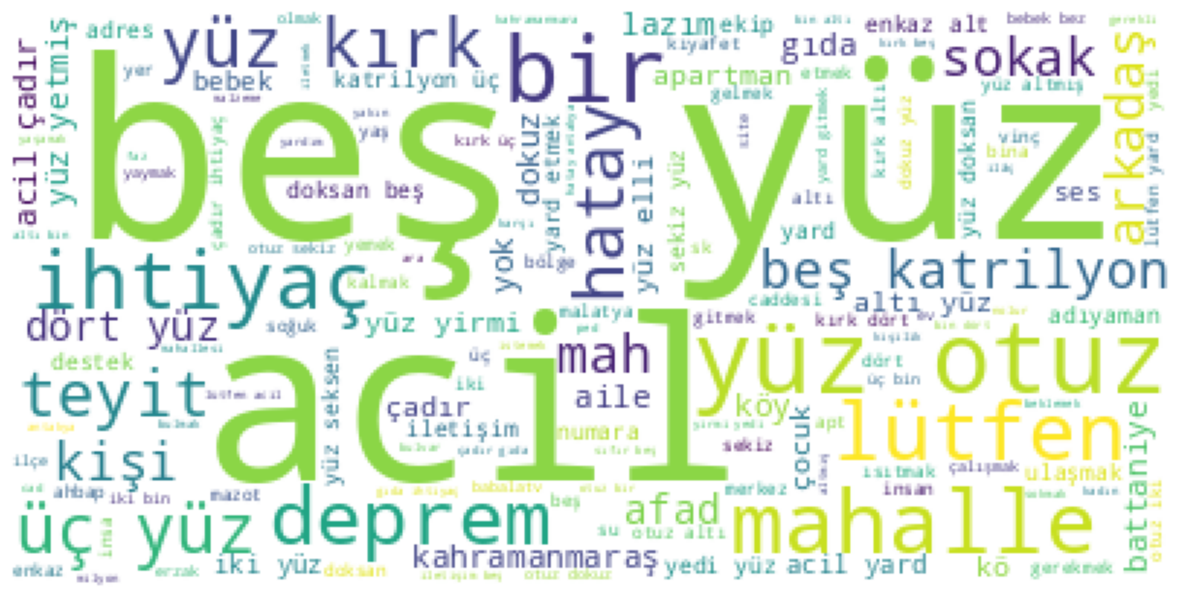

In [81]:
text = " ".join(i for i in data[data.Class==1].Tweets )
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud  )
plt.axis("off")
plt.show()

In [82]:
from PIL import Image

In [83]:
build = np.array(Image.open("/content/drive/MyDrive/city-town-house-vector-facade-face-side-street-view-modern-world-building-cartoon-architecture-illustration-154058303.jpg"))
build

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 17, 118, 174],
        [ 17, 118, 174],
        [ 17, 118, 174],
        ...,
        [ 17, 118, 174],
        [ 17, 118, 174],
        [ 17, 118, 174]],

       [[ 17, 118, 174],
        [ 17, 118, 174],
        [ 17, 118, 174],
        ...,
        [ 17, 118, 174],
        [ 17, 118, 174],
        [ 17, 118, 174]],

       [[ 17, 118, 174],
        [ 17, 118, 174],
        [ 17, 118, 174],
        ...,
        [ 17, 118, 174],
        [ 17, 118, 174],
        [ 17, 118, 174]]

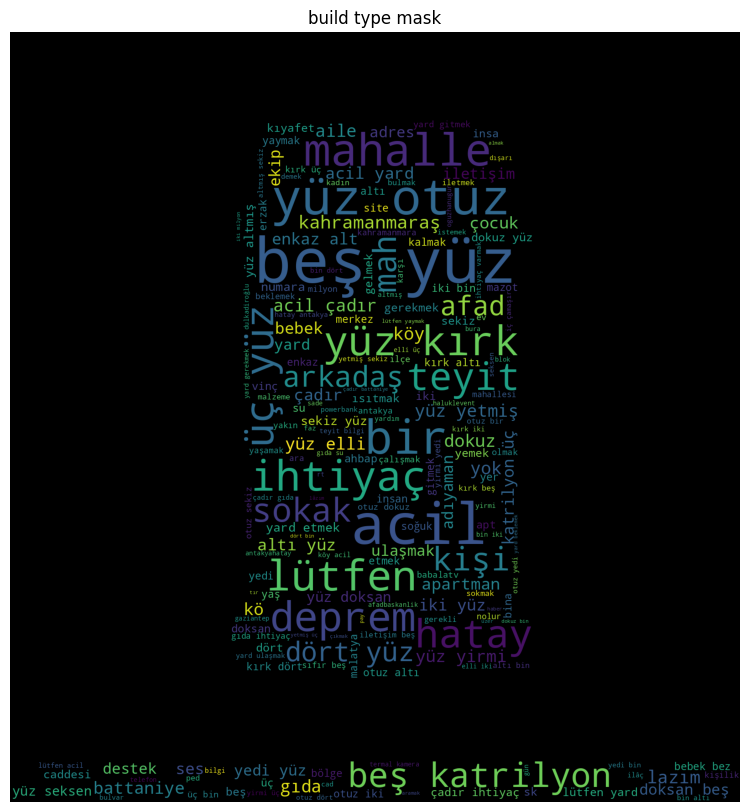

In [84]:
text = " ".join(i for i in data[data.Class==1].Tweets )
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black", mask=build).generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud  )
plt.axis("off")
plt.title("build type mask")
plt.show()

In [85]:
from collections import Counter

In [86]:
tekrar_edenler=Counter(text.split())

In [87]:
en_çok_tkrr=tekrar_edenler.most_common(300)

In [88]:
kelimeler=[]
kelime_sayıları=[]

for i in range(len(en_çok_tkrr)):
  kelimeler.append(en_çok_tkrr[i][0])
  kelime_sayıları.append( en_çok_tkrr[i][1] )
  

In [89]:
sayisal_karakterler = ['sıfır', 'bir', 'iki', 'üç', 'dört', 'beş', 'altı', 'yedi', 'sekiz', 'dokuz','on','yüz',"bin","milyon","katrilyon"
                        'yirmi','otuz','kırk','elli','altmış','yetmiş','seksen','doksan']
# burada sayılar gereksiz oldukları için siliniyor

for i in range(len(kelimeler)):
  for n in sayisal_karakterler:
    if(kelimeler[i] == n ):

      kelimeler[i]=np.nan
      kelime_sayıları[i]=np.nan
      
      
      

In [90]:
kelime_sayıları = [x for x in kelime_sayıları if str(x) != 'nan']
kelimeler = [x for x in kelimeler if str(x) != 'nan']



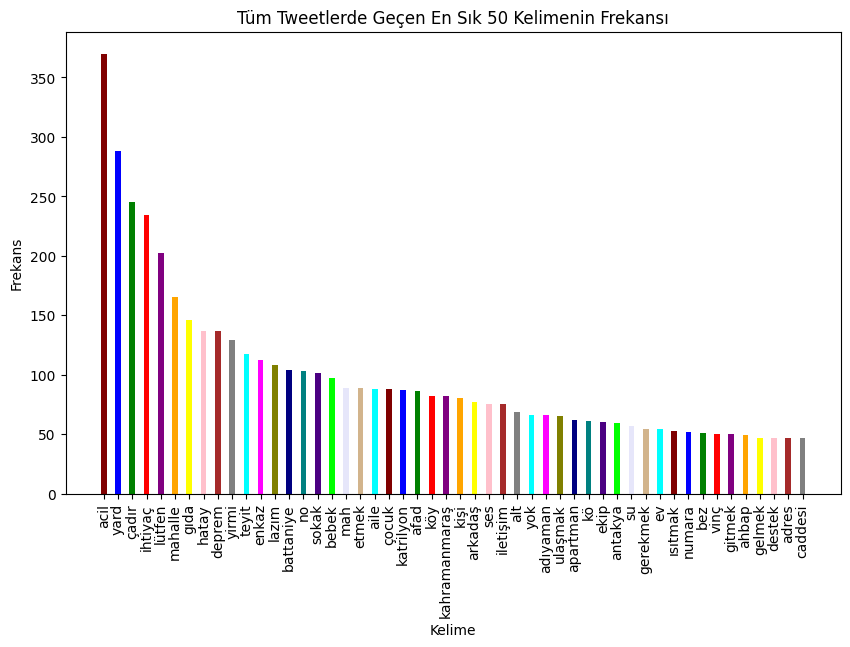

In [91]:
plt.figure(figsize=(10,6))
# Kelime frekansları inceleniyor .
renkler = ['maroon', 'blue', 'green', 'red', 'purple', 'orange', 'yellow', 'pink', 'brown', 'gray', 'cyan', 'magenta', 'olive', 'navy', 'teal', 'indigo', 'lime', 'lavender', 'tan', 'aqua']
plt.bar(kelimeler[:50], kelime_sayıları[:50], color = renkler[:50], width = 0.4)


plt.xlabel("Kelime")
plt.ylabel("Frekans")
plt.title("Tüm Tweetlerde Geçen En Sık 50 Kelimenin Frekansı")


plt.xticks(rotation=90)
plt.show()

In [92]:
kelimeler[0]="yardım" # yanlış çıktı düzeltiliyor .
for i in range(len(kelimeler)):
  print("kelime : ",kelimeler[i] , "   sayısı : ",kelime_sayıları[i])

kelime :  yardım    sayısı :  370
kelime :  yard    sayısı :  288
kelime :  çadır    sayısı :  245
kelime :  ihtiyaç    sayısı :  234
kelime :  lütfen    sayısı :  202
kelime :  mahalle    sayısı :  165
kelime :  gıda    sayısı :  146
kelime :  hatay    sayısı :  137
kelime :  deprem    sayısı :  137
kelime :  yirmi    sayısı :  129
kelime :  teyit    sayısı :  117
kelime :  enkaz    sayısı :  112
kelime :  lazım    sayısı :  108
kelime :  battaniye    sayısı :  104
kelime :  no    sayısı :  103
kelime :  sokak    sayısı :  101
kelime :  bebek    sayısı :  97
kelime :  mah    sayısı :  89
kelime :  etmek    sayısı :  89
kelime :  aile    sayısı :  88
kelime :  çocuk    sayısı :  88
kelime :  katrilyon    sayısı :  87
kelime :  afad    sayısı :  86
kelime :  köy    sayısı :  82
kelime :  kahramanmaraş    sayısı :  82
kelime :  kişi    sayısı :  80
kelime :  arkadaş    sayısı :  77
kelime :  ses    sayısı :  75
kelime :  iletişim    sayısı :  75
kelime :  alt    sayısı :  69
kelime :  yo

In [93]:
text="" # en son kelimeler ve kelime sayısı kadar tekrar

for i in range(len(kelimeler)):
  text+= (kelimeler[i] +" ")* kelime_sayıları[i]


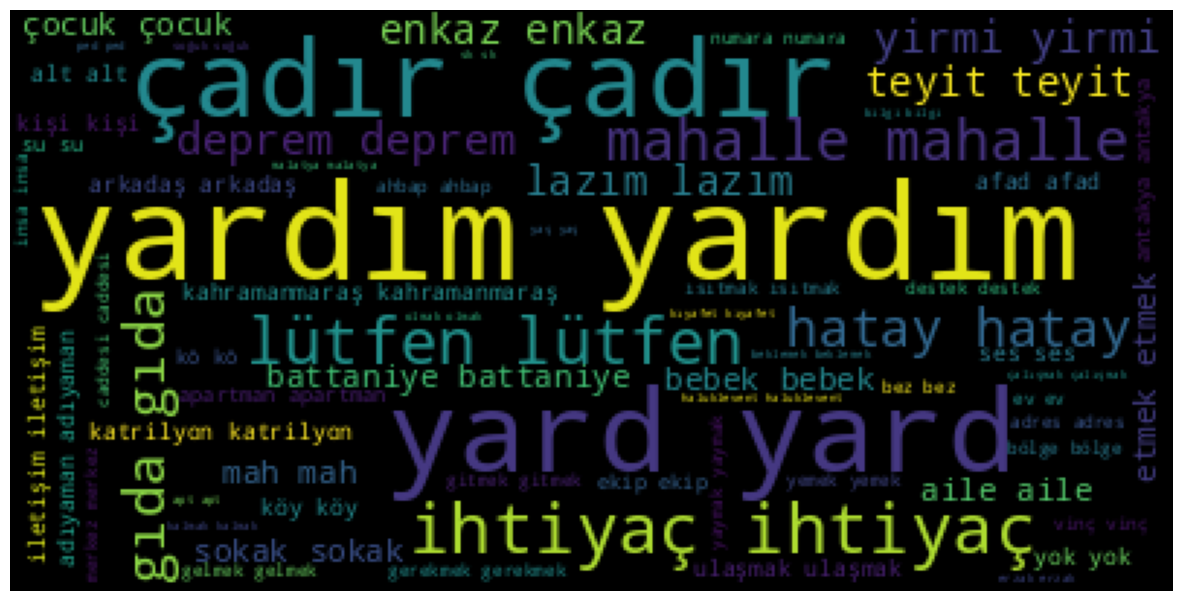

In [94]:

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud  )
plt.axis("off")
plt.show()

# 8) Sonuç test aşaması



*   Bu aşamada daha önce hiç gösterilmeyen veriler üzerine test yapılıyor .
*   Modelin doğruluğu analizi için 100 veri kullanıldı .



In [95]:
data_valid=pd.read_csv("/content/drive/MyDrive/yardım_valid.csv")

In [96]:
data_valid

,tweet
0,Ziraat Bankası’ndan herkese peş peşe acil bild...
1,köyü olan acil köyüne dönsün. imkanı olan yurt...
2,@ohmybeautybank Pakai baju tahun kemarin aja d...
3,@kraljulien @zubeydesariii Mevcut durumu ileti...
4,#deprem #dikkat #acil #YardimTalebi https://t....
...,...
95,@alpertunasesver @_samiyenhaber acil abii acil rt
96,@fakirsila engel atın diom acil
97,ACIL ACIL KANGEN PAKE AVA ACILLLLL😭😭😭😭😭😭 LUCU ...
98,#ufogoruldu acil


In [97]:
# ön işleme süreci
for i in data_valid.index:
  metin=data_valid.tweet.values[i]

  silinmiş_hal =remove_emojis( metin  ) # emoji silme 
  işaretsiz_hali=normalizer.remove_punctuations(silinmiş_hal) # noktalama işaretleri silindi 
  küçük_harf=normalizer.lower_case(işaretsiz_hali) # büyük harfler değiştirildi .


  kelimeler = stopword_remover.drop_stop_words(küçük_harf.split()) # kelimeleri köklerine çevirmek metni için bölüyoruz .
  kelime_kökü=[ analyzer.lemmatize(kelime) for kelime in kelimeler ]


  son_kelime=[]

  for i in kelime_kökü:
    son_kelime.append(normalizer.remove_punctuations( str( i ).split()[1]))

  son_kelime = " ".join(son_kelime) # kelimeler birleştiriliyor .
  son_kelime=normalizer.lower_case(son_kelime) # büyük harfler değiştirildi .
  son_kelime = normalizer.convert_numbers_to_words(son_kelime.split()) # sayıları rakamlardan harflere çeviriyor .
  son_kelime = " ".join(son_kelime) # kelimeler birleştiriliyor .

  data_valid.tweet =data_valid.tweet.replace( metin ,son_kelime)  


In [98]:
data_valid

,tweet
0,ziraat banka peş peş acil bildiri gitmek yapma...
1,kö acil köy dönmek imkân yurtdışı kaç
2,ohmybeautybank pakai baju tahun kemarin aja de...
3,kraljulien zubeydesariii mevcut durum ileti ça...
4,deprem dikkat acil yardimtalebi httpstcow5qnw1...
...,...
95,alpertunasesver samiyenhaber acil abii acil rt
96,fakirsila engel at diom acil
97,acıl acıl kangen pake av acılllll lu bgt acıl
98,ufogoruldu acil


In [99]:
tahim_sınıfı=[]
for i in data_valid.tweet.values:
  data_train = cv.transform([ i  ]).toarray()
  tahim_sınıfı.append(model.predict(data_train))


tahim_sınıfı[:5]



[array([0.]), array([1.]), array([0.]), array([0.]), array([0.])]

In [100]:
data_valid["tahim_sınıfı"]=tahim_sınıfı
data_valid

,tweet,tahim_sınıfı
0,ziraat banka peş peş acil bildiri gitmek yapma...,[0.0]
1,kö acil köy dönmek imkân yurtdışı kaç,[1.0]
2,ohmybeautybank pakai baju tahun kemarin aja de...,[0.0]
3,kraljulien zubeydesariii mevcut durum ileti ça...,[0.0]
4,deprem dikkat acil yardimtalebi httpstcow5qnw1...,[0.0]
...,...,...
95,alpertunasesver samiyenhaber acil abii acil rt,[0.0]
96,fakirsila engel at diom acil,[0.0]
97,acıl acıl kangen pake av acılllll lu bgt acıl,[0.0]
98,ufogoruldu acil,[0.0]


In [101]:
data_valid.tahim_sınıfı.value_counts()

[0.0]    91
[1.0]     9
Name: tahim_sınıfı, dtype: int64

In [102]:
sonuc=pd.read_csv("/content/drive/MyDrive/yardım_valid.csv")
sonuc["tahim_sınıfı"]=tahim_sınıfı
sonuc

,tweet,tahim_sınıfı
0,Ziraat Bankası’ndan herkese peş peşe acil bild...,[0.0]
1,köyü olan acil köyüne dönsün. imkanı olan yurt...,[1.0]
2,@ohmybeautybank Pakai baju tahun kemarin aja d...,[0.0]
3,@kraljulien @zubeydesariii Mevcut durumu ileti...,[0.0]
4,#deprem #dikkat #acil #YardimTalebi https://t....,[0.0]
...,...,...
95,@alpertunasesver @_samiyenhaber acil abii acil rt,[0.0]
96,@fakirsila engel atın diom acil,[0.0]
97,ACIL ACIL KANGEN PAKE AVA ACILLLLL😭😭😭😭😭😭 LUCU ...,[0.0]
98,#ufogoruldu acil,[0.0]
